In [1]:
# Import
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# from fastai.structured import add_datepart

# Linear Regression
from sklearn.linear_model import LogisticRegression

In [2]:
# Read data from local repo
df = pd.read_csv('data/daily_sentimental.csv')

# Add STOCH indicator

In [3]:
symbl = 'AAPL'
apiKey = 'MSXSR0YHC991CZN6'

# Fetch SMA Data
stoch = pd.read_csv('https://www.alphavantage.co/query?function=STOCH&symbol=' + symbl + '&interval=daily&time_period=10&series_type=open&apikey=' + apiKey + '&datatype=csv')

In [4]:
# Drop the first row and reset index
stoch = stoch[1:].reset_index()

In [5]:
df_stoch = pd.concat([df, stoch], axis=1, join_axes=[df.index])
df_stoch.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,neg,neu,pos,index,time,SlowD,SlowK
0,2000-01-03,104.8750,112.500,101.688,111.938,133949200,102.813,1.0,0.051,0.871,0.078,1,2019-11-15,89.5600,89.3097
1,2000-01-04,108.2500,110.625,101.188,102.500,128094400,111.938,0.0,0.056,0.904,0.039,2,2019-11-14,90.8006,85.6698
2,2000-01-05,103.7500,110.563,103.000,104.000,194580400,102.500,0.0,0.093,0.828,0.079,3,2019-11-13,93.5839,93.7007
3,2000-01-06,106.1183,107.000,95.000,95.000,191993200,104.000,0.0,0.079,0.835,0.086,4,2019-11-12,93.6084,93.0314
4,2000-01-07,96.5000,101.000,95.500,99.500,115183600,95.000,1.0,0.072,0.838,0.090,5,2019-11-11,93.9506,94.0196


In [6]:
# Drop abundant timestamp and index columns
df_stoch = df_stoch.drop(columns = ['index','time'])
df_stoch.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,neg,neu,pos,SlowD,SlowK
0,2000-01-03,104.8750,112.500,101.688,111.938,133949200,102.813,1.0,0.051,0.871,0.078,89.5600,89.3097
1,2000-01-04,108.2500,110.625,101.188,102.500,128094400,111.938,0.0,0.056,0.904,0.039,90.8006,85.6698
2,2000-01-05,103.7500,110.563,103.000,104.000,194580400,102.500,0.0,0.093,0.828,0.079,93.5839,93.7007
3,2000-01-06,106.1183,107.000,95.000,95.000,191993200,104.000,0.0,0.079,0.835,0.086,93.6084,93.0314
4,2000-01-07,96.5000,101.000,95.500,99.500,115183600,95.000,1.0,0.072,0.838,0.090,93.9506,94.0196


# Add moving average (SMA) values

In [7]:
symbl = 'AAPL'
apiKey = 'MSXSR0YHC991CZN6'

# Fetch SMA Data
sma = pd.read_csv('https://www.alphavantage.co/query?function=SMA&symbol=' + symbl + '&interval=daily&time_period=10&series_type=open&apikey=' + apiKey + '&datatype=csv')

In [8]:
# Drop the first row and reset index
sma = sma[1:].reset_index()

In [9]:
df_sma = pd.concat([df_stoch, sma], axis=1, join_axes=[df.index])
df_sma.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,neg,neu,pos,SlowD,SlowK,index,time,SMA
0,2000-01-03,104.8750,112.500,101.688,111.938,133949200,102.813,1.0,0.051,0.871,0.078,89.5600,89.3097,1,2019-11-15,259.699
1,2000-01-04,108.2500,110.625,101.188,102.500,128094400,111.938,0.0,0.056,0.904,0.039,90.8006,85.6698,2,2019-11-14,258.285
2,2000-01-05,103.7500,110.563,103.000,104.000,194580400,102.500,0.0,0.093,0.828,0.079,93.5839,93.7007,3,2019-11-13,256.634
3,2000-01-06,106.1183,107.000,95.000,95.000,191993200,104.000,0.0,0.079,0.835,0.086,93.6084,93.0314,4,2019-11-12,254.997
4,2000-01-07,96.5000,101.000,95.500,99.500,115183600,95.000,1.0,0.072,0.838,0.090,93.9506,94.0196,5,2019-11-11,253.739


In [10]:
# Drop abundant timestamp and index columns
df_sma = df_sma.drop(columns = ['index','time'])
df_sma.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,neg,neu,pos,SlowD,SlowK,SMA
0,2000-01-03,104.8750,112.500,101.688,111.938,133949200,102.813,1.0,0.051,0.871,0.078,89.5600,89.3097,259.699
1,2000-01-04,108.2500,110.625,101.188,102.500,128094400,111.938,0.0,0.056,0.904,0.039,90.8006,85.6698,258.285
2,2000-01-05,103.7500,110.563,103.000,104.000,194580400,102.500,0.0,0.093,0.828,0.079,93.5839,93.7007,256.634
3,2000-01-06,106.1183,107.000,95.000,95.000,191993200,104.000,0.0,0.079,0.835,0.086,93.6084,93.0314,254.997
4,2000-01-07,96.5000,101.000,95.500,99.500,115183600,95.000,1.0,0.072,0.838,0.090,93.9506,94.0196,253.739


# Add moving average convergence / divergence (MACD) values

In [11]:
symbl = 'AAPL'
apiKey = 'MSXSR0YHC991CZN6'

# Fetch SMA Data
macd = pd.read_csv('https://www.alphavantage.co/query?function=MACD&symbol=' + symbl + '&interval=daily&time_period=10&series_type=open&apikey=' + apiKey + '&datatype=csv')

In [12]:
# Drop the first row and reset index
macd = macd[1:].reset_index()

In [13]:
df_macd = pd.concat([df_sma, macd], axis=1, join_axes=[df.index])
df_macd.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,neg,neu,pos,SlowD,SlowK,SMA,index,time,MACD,MACD_Hist,MACD_Signal
0,2000-01-03,104.8750,112.500,101.688,111.938,133949200,102.813,1.0,0.051,0.871,0.078,89.5600,89.3097,259.699,1,2019-11-15,8.4011,0.2700,8.1311
1,2000-01-04,108.2500,110.625,101.188,102.500,128094400,111.938,0.0,0.056,0.904,0.039,90.8006,85.6698,258.285,2,2019-11-14,8.4432,0.3796,8.0636
2,2000-01-05,103.7500,110.563,103.000,104.000,194580400,102.500,0.0,0.093,0.828,0.079,93.5839,93.7007,256.634,3,2019-11-13,8.3670,0.3983,7.9687
3,2000-01-06,106.1183,107.000,95.000,95.000,191993200,104.000,0.0,0.079,0.835,0.086,93.6084,93.0314,254.997,4,2019-11-12,8.4148,0.5456,7.8692
4,2000-01-07,96.5000,101.000,95.500,99.500,115183600,95.000,1.0,0.072,0.838,0.090,93.9506,94.0196,253.739,5,2019-11-11,8.3106,0.5779,7.7327


In [14]:
# Drop abundant timestamp and index columns
df_all = df_macd.drop(columns = ['index','time'])
df_all.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,neg,neu,pos,SlowD,SlowK,SMA,MACD,MACD_Hist,MACD_Signal
0,2000-01-03,104.8750,112.500,101.688,111.938,133949200,102.813,1.0,0.051,0.871,0.078,89.5600,89.3097,259.699,8.4011,0.2700,8.1311
1,2000-01-04,108.2500,110.625,101.188,102.500,128094400,111.938,0.0,0.056,0.904,0.039,90.8006,85.6698,258.285,8.4432,0.3796,8.0636
2,2000-01-05,103.7500,110.563,103.000,104.000,194580400,102.500,0.0,0.093,0.828,0.079,93.5839,93.7007,256.634,8.3670,0.3983,7.9687
3,2000-01-06,106.1183,107.000,95.000,95.000,191993200,104.000,0.0,0.079,0.835,0.086,93.6084,93.0314,254.997,8.4148,0.5456,7.8692
4,2000-01-07,96.5000,101.000,95.500,99.500,115183600,95.000,1.0,0.072,0.838,0.090,93.9506,94.0196,253.739,8.3106,0.5779,7.7327


# Find correlation

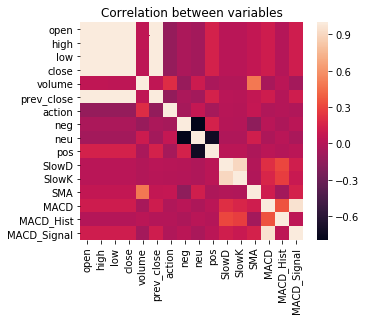

In [15]:
corr = df_all.corr()
f, ax = plt.subplots(figsize=(5, 4))
plt.title("Correlation between variables")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [16]:
df_all_drop=df_all.drop(columns = ['open','high','low','close','prev_close','volume'])

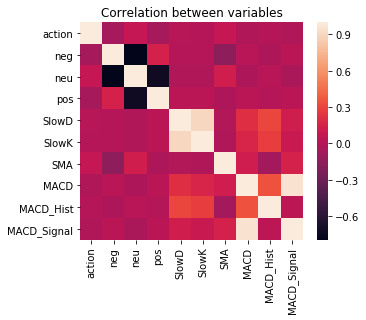

In [17]:
corr = df_all_drop.corr()
f, ax = plt.subplots(figsize=(5, 4))
plt.title("Correlation between variables")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Logistic Regression

In [18]:
my_data=df_all_drop.dropna()

In [19]:
my_data.isnull().sum(axis = 0)

timestamp      0
action         0
neg            0
neu            0
pos            0
SlowD          0
SlowK          0
SMA            0
MACD           0
MACD_Hist      0
MACD_Signal    0
dtype: int64

In [21]:
# Write dataframe to access locally
my_data.to_csv("data/daily_data_cleaned.csv", index=False)

In [65]:
from sklearn.model_selection import train_test_split

my_data['timestamp'] = pd.to_datetime(my_data['timestamp'], format='%Y-%m-%d')
my_data.index = my_data['timestamp']

feature_cols = ['neg', 'neu', 'pos', 'SlowD', 'SlowK', 'SMA', 'MACD', 'MACD_Hist', 'MACD_Signal']
# feature_cols = ['SlowD']
target = 'action'
X = my_data[feature_cols]
y = my_data[target]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(class_weight = 'balanced')

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
y_conf=logreg.decision_function(X_test)

/Users/thupham/anaconda3/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/thupham/anaconda3/envs/py3k/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
result = pd.DataFrame({ 'test': y_test, 'pred': y_pred, 'conf': y_conf }, columns=['test','pred','conf'])
result = result[result['pred'] == 1.0]
result

,test,pred,conf
timestamp,,,
2011-01-04,0.0,1.0,0.360218
2010-10-27,0.0,1.0,0.087390
2004-04-02,0.0,1.0,0.054115
2001-05-10,0.0,1.0,0.153645
2016-05-25,0.0,1.0,0.118613
2010-12-08,0.0,1.0,0.118137
2008-04-09,0.0,1.0,0.082767
2005-12-14,0.0,1.0,0.404900
2000-12-26,0.0,1.0,0.300007


In [67]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6358244365361803
Precision: 0.14802631578947367
Recall: 0.4838709677419355


In [68]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[491, 259],
       [ 48,  45]])

Text(0.5, 257.44, 'Predicted')

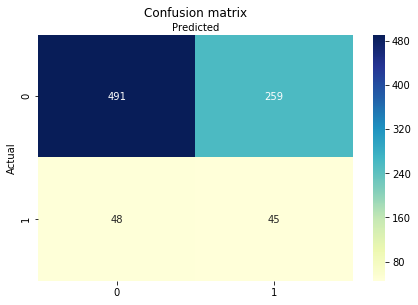

In [69]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Support Vector Machine

In [70]:
from sklearn import svm

# Initiate model
svc = svm.SVC(kernel='rbf')

# Fit model
svc.fit(X_train, y_train)

/Users/thupham/anaconda3/envs/py3k/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [71]:
y_pred=svc.predict(X_test)
y_conf=svc.decision_function(X_test)

In [72]:
result = pd.DataFrame({ 'test': y_test, 'pred': y_pred, 'conf': y_conf }, columns=['test','pred','conf'])
result = result[result['pred'] == 1.0]
result

,test,pred,conf
timestamp,,,
2001-03-05,1.0,1.0,0.260317


In [73]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8908659549228944
Precision: 1.0
Recall: 0.010752688172043012


In [74]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[750,   0],
       [ 92,   1]])

Text(0.5, 257.44, 'Predicted')

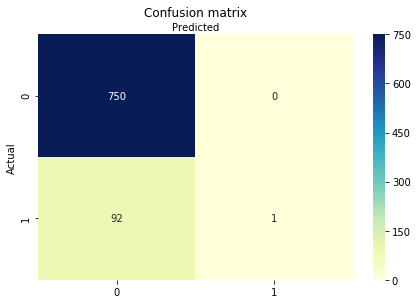

In [75]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Keras Sequential

In [76]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [109]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU

# Import `Dense` from `keras.layers`
from keras.layers import Dense

model.add(LeakyReLU(alpha=0.5))
# Initialize the constructor
# model = Sequential()

# Add an input layer 
# model.add(Dense(12, activation='tanh', input_shape=(9,)))

# Add one hidden layer 
# model.add(Dense(8, activation='tanh'))

# Add an output layer 
# model.add(Dense(1, activation='sigmoid'))

In [110]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
3369/3369 [==============================] - 4s 1ms/step - loss: 0.3185 - acc: 0.8878
Epoch 2/20
3369/3369 [==============================] - 3s 1ms/step - loss: 0.3177 - acc: 0.8863
Epoch 3/20
3369/3369 [==============================] - 4s 1ms/step - loss: 0.3164 - acc: 0.8890
Epoch 4/20
3369/3369 [==============================] - 5s 1ms/step - loss: 0.3167 - acc: 0.8884
Epoch 5/20
3369/3369 [==============================] - 3s 1ms/step - loss: 0.3164 - acc: 0.8869
Epoch 6/20
3369/3369 [==============================] - 3s 958us/step - loss: 0.3155 - acc: 0.8878
Epoch 7/20
3369/3369 [==============================] - 3s 980us/step - loss: 0.3161 - acc: 0.8869
Epoch 8/20
3369/3369 [==============================] - 3s 945us/step - loss: 0.3133 - acc: 0.8890
Epoch 9/20
3369/3369 [==============================] - 3s 941us/step - loss: 0.3146 - acc: 0.8881
Epoch 10/20
3369/3369 [==============================] - 3s 942us/step - loss: 0.3149 - acc: 0.8872
Epoch 11/20
3369/33

In [122]:
y_pred = model.predict_classes(X_test)
y_pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

In [116]:
# Precision 
precision_score(y_test, y_pred)

0.125

In [118]:
# Recall
recall_score(y_test, y_pred)

0.010752688172043012

In [119]:
# Accucracy
accuracy_score(y_test, y_pred)

0.8825622775800712

Text(0.5, 257.44, 'Predicted')

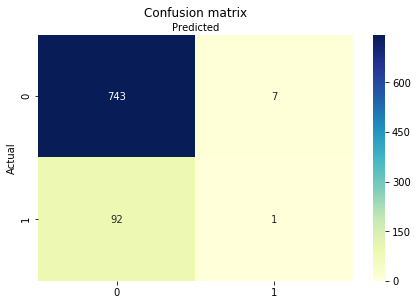

In [123]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [124]:
mse_value, mae_value = model.evaluate(X_test, y_test, verbose=0)
mse_value

0.34811297278245856

In [125]:
# F1 score
f1_score(y_test,y_pred)

0.019801980198019806